# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Erick Santoso
- **Email:** erick.santoso@student.pelitaindonesia.ac.id
- **ID Dicoding:** erick_santoso_mAfz

## Menentukan Pertanyaan Bisnis

- Bagaimana performa rental dalam beberapa bulan terakhir?
- Apakah ada pengaruh antara cuaca dengan performa rental?
- Kapan waktu puncak pengguna dalam melakukan rental, apakah di subuh, pagi, siang, sore, atau malam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("Bike-sharing-dataset\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("Bike-sharing-dataset\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat 2 dataset yang akan kita gunakan yaitu day.csv dan hour.csv
- Kedua dataset tersebut memiliki field atau kolom yang sama namun pada hour_df terdapat field tambahan yaitu "hr"

### Assessing Data

In [4]:
#Mengecek jumlah dan tipe data yang ada di dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#Mengecek apakah ada missing value di day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Memeriksa apakah ada duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
#Mengecek parameter statistik dari day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#Mengecek jumlah dan tipe data yang ada di dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
#Mengecek apakah ada missing value di hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#Memeriksa apakah ada duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
#Mengecek parameter statistik dari hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- day_df dan hour_df tidak memiliki masalah dalam jumlah data, missing value, dan duplikasi data.
- Terdapat tipe data yang kurang tepat pada kolom "dteday" yang mana seharusnya direprentasikan dengan tipe data datetime, bukan object.

### Cleaning Data

In [12]:
#Mengganti tipe data pada kolom dteday dari object men jadi datetime.

datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data pada kolom "dteday" yang awalnya adalah object telah diganti menjadi tipe data yang lebih sesuai yaitu datetime

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dari rangkuman diatas, kita dapat mengetahui rata-rata jumlah rental per hari adalah kurang lebih 4504 yang terbagi menjadi 848 untuk casual user dan 3656 untuk registered user.

In [16]:
#Menghitung jumlah rental tiap musim 
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

Berdasarkan hasil tersebut, maka musim yang memiliki jumlah rental terbanyak adalah fall.

In [17]:
#Menghitung pengaruh cuaca terhadap jumlah rental
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

Berdasarkan hasil tersebut, maka cuaca yang memiliki jumlah rental terbanyak adalah cuaca 1 (Clear, Few clouds, Partly cloudy).

### Explore data hour_df

In [18]:
#mengelompokkan waktu dari 0-23 menjadi pagi, siang, malam, subuh, dan sore
hour_df["time_period"] = hour_df.hr.apply(
        lambda x: "Pagi" if 6 <= x < 11 else (
        "Siang" if 11 <= x < 15 else (
        "Sore" if 15 <= x < 19 else 
        "Malam" if 19 <= x or x == 0 else 
        "Subuh" if x < 6 else "Tidak ada"
        )))
hour_df.groupby(by="time_period").cnt.sum().sort_values(ascending=False)

time_period
Sore     1057529
Pagi      755999
Malam     715467
Siang     696305
Subuh      67379
Name: cnt, dtype: int64

Berdasarkan hasil tersebut, kita dapat mengetahui bahwa kebanyakan user melakukan rental pada sore hari yaitu pada jam 15:00 - 19:00

**Insight:**
- Jumlah rata-rata rental per hari adalah kurang lebih 4504 sepeda.
- Fall merupakan musim yang memiliki jumlah rental terbanyak.
- Cuaca yang memiliki jumlah rental terbanyak adlalah cuaca 1 (Clear, Few Clouds, Partly Cloudy)
- Sore merupakan waktu yang paling populer untuk user melakukan rental.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa rental dalam beberapa bulan terakhir?

In [19]:
#Menghitung total rental tiap bulan
monthly_orders_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "cnt": "Total Rental"
}, inplace=True)
monthly_orders_df.head()

C:\Users\erick\AppData\Local\Temp\ipykernel_18132\2013717813.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = day_df.resample(rule='M', on='dteday').agg({


,dteday,Total Rental
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


C:\Users\erick\AppData\Local\Temp\ipykernel_18132\165476070.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = day_df.resample(rule='M', on='dteday').agg({


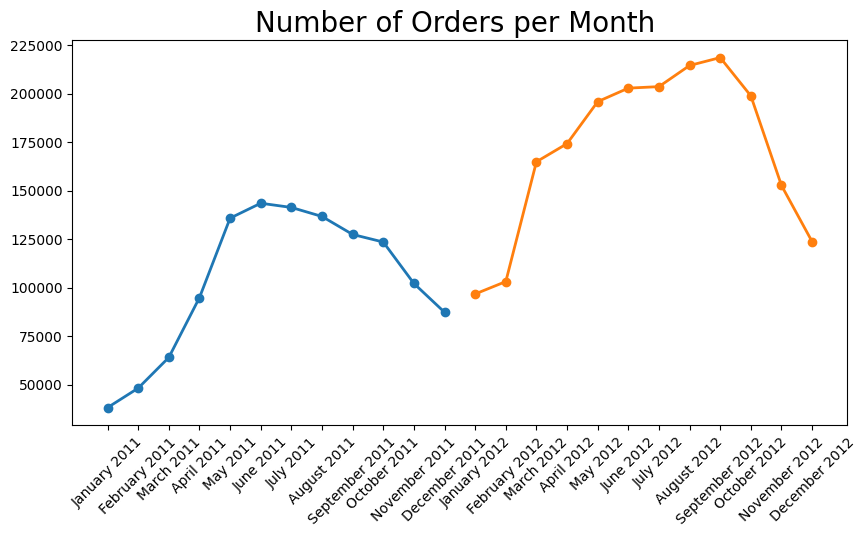

In [20]:
monthly_orders_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

monthly_orders_df['Year'] = monthly_orders_df.index.year
monthly_orders_df['Month'] = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_orders_df['Month_Year'] = monthly_orders_df['Month'] + ' ' + monthly_orders_df['Year'].astype(str)

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "cnt": "Total Rental"
}, inplace=True)
 
plt.figure(figsize=(10, 5)) 
for year in monthly_orders_df['Year'].unique():
    plt.plot(
        monthly_orders_df[monthly_orders_df['Year'] == year]['Month_Year'],
        monthly_orders_df[monthly_orders_df['Year'] == year]['Total Rental'],
        marker='o',
        linewidth=2,
        label=str(year)  
    )
plt.title("Number of Orders per Month ", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 2: Apakah ada pengaruh antara cuaca dengan performa rental?

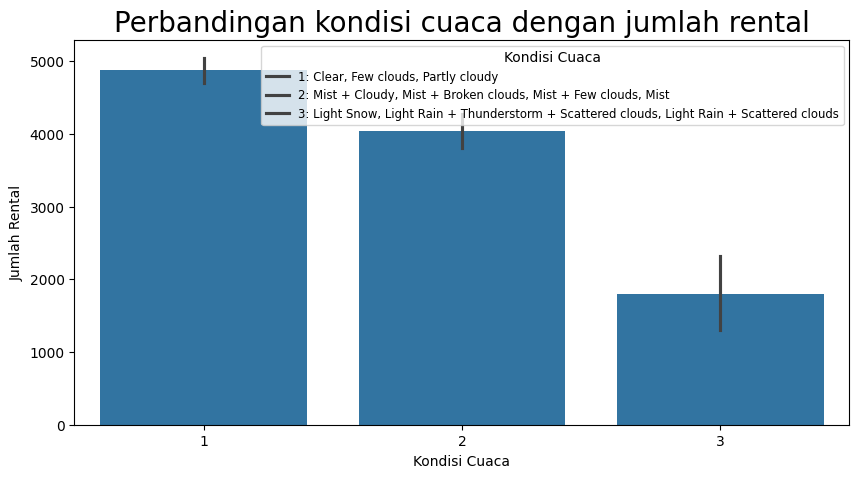

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x = day_df["weathersit"],
    y = day_df["cnt"],
)
plt.title("Perbandingan kondisi cuaca dengan jumlah rental", loc="center", fontsize=20)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rental')
plt.legend(
    title='Kondisi Cuaca',
    labels=[
        '1: Clear, Few clouds, Partly cloudy',  # Ubah sesuai dengan makna sebenarnya
        '2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',  # Ubah sesuai dengan makna sebenarnya
        '3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'  # Ubah sesuai dengan makna sebenarnya
    ],
    loc='upper right',
    fontsize='small'
)
plt.show()

**Insight:**
- Dari visualisasi pada pertanyaan 1, kita dapat melihat performa rental dimana terdapat penurunan pada bulan September 2012 hingga Desember 2012.
- Dari visualisasi pada pertanyaan 2, kita dapat mengetahui user cenderung menyewa rental sepeda pada kondisi cuaca 1 yaitu Clear, Few clouds, dan Partly cloudy.

## Analisis Lanjutan (Opsional)

### Pertanyaan 3: Kapan waktu puncak pengguna dalam melakukan rental, apakah di subuh, pagi, siang, sore, atau malam?

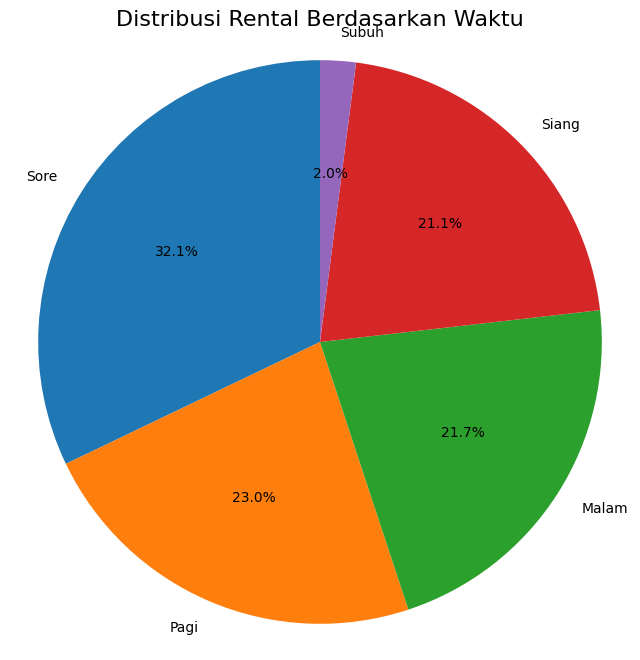

In [22]:
#Analisa menggunakan teknik clustering
time_period_counts = hour_df.groupby(by="time_period").cnt.sum().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(time_period_counts, labels=time_period_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Rental Berdasarkan Waktu", fontsize=16)
plt.axis('equal')  
plt.show()

**Insight:**
- Dari visualisasi pada pertanyaan 3, kita dapat mengetahui user cenderung menyewa rental sepeda pada sore hari.
- Tujuan teknik analisis clustering adalah untuk mengidentifikasi pola waktu puncak pengguna dalam melakukan rental sepeda, apakah itu di subuh, pagi, siang, sore, atau malam. Dengan mengelompokkan data berdasarkan waktu sewa, kita dapat menentukan kapan pengguna paling aktif. Informasi ini membantu perusahaan mengatur ketersediaan sepeda, merencanakan promosi, dan meningkatkan layanan sesuai dengan permintaan tinggi.

## Conclusion

- Dari visualisasi yang ditampilkan pada pertanyaan 1, kita dapat mengamati performa rental yang menunjukkan tren penurunan signifikan dari bulan September 2012 hingga Desember 2012. Hal ini menandakan perlunya analisis lebih lanjut untuk memahami penyebab di balik tren ini dan untuk mengembangkan strategi yang tepat dalam meningkatkan jumlah rental di bulan-bulan berikutnya.
- Dari visualisasi yang ditampilkan pada pertanyaan 2, kita dapat melihat bahwa user cenderung lebih aktif menyewa sepeda pada cuaca 1 (Clear, Few Clouds, Partly Cloudy). Dengan memahami adanya permintaan yang tinggi pada cuaca 1, perusahaan dapat memprediksi kebutuhan sewa sehingga menyediakan lebih banyak sepeda saat cuaca cerah.
- Dari visualisasi dan analisis yang ditampilkan pada pertanyaan 3, kita dapat melihat bahwa pengguna cenderung lebih aktif menyewa sepeda pada sore hari (15:00 - 19:00). Hal ini menunjukkan bahwa ada permintaan yang signifikan untuk layanan rental sepeda pada waktu tersebut sehingga perusahaan dapat meningkatkan layanan ataupun promosi pada waktu ini untuk memanfaatkan tren ini.